In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# importing La ligas 4 main teams data
df1=pd.read_csv("Real madrid players data.csv")
df2=pd.read_csv("Barcelona players data.csv")
df3=pd.read_csv("Valencia players data.csv")
df4=pd.read_csv("Atletico Madrid players data.csv")

#importing EPLs 4 main teams data
df5=pd.read_csv("ManU players data.csv")
df6=pd.read_csv("Liverpool players data.csv")
df7=pd.read_csv("Chelsea players data.csv")
df8=pd.read_csv("Arsenal players data.csv")


In [3]:
#Preprocessing,removing unecessary columns and renaming similar columns to bring all csvs in one single format 

df1=df1.rename(columns={"Pos[NB]":"Position","Real Madrid career":"Year"})
df1=df1.drop(["Captaincy","Apps","Goals"],axis=1)

df2=df2.rename(columns={"Position[NB]":"Position","Barcelona career":"Year"})
df2=df2.drop(["Captaincy[9]","League appearances","League goals"],axis=1)

df3=df3.rename(columns={"Pos[NB]":"Position","Valencia career":"Year"})
df3=df3.drop(["Apps","Goals"],axis=1)

df4=df4.rename(columns={"Atlético Madrid career":"Year"})
df4=df4.drop(["Appearances","Goals"],axis=1)

# concatenating la liga all 4 teams
dflaliga=pd.concat([df1,df2,df3,df4])

#Preprocessing,removing unecessary columns and renaming similar columns to bring all csvs in one single format 


df5=df5.rename(columns={"Manchester Defendernitedcareer":"Year"})
df5=df5.drop(["Starts","Total","Goals","SDefenderbs"],axis=1)

df6=df6.rename(columns={"Liverpool career":"Year"})
df6=df6.drop(["Goals","Appearances","Appearances.1","Appearances.2"],axis=1)

df7=df7.rename(columns={"Chelsea career":"Year"})
df7=df7.drop(["Goals","Appearances"],axis=1)

df8=df8.rename(columns={"Club career":"Year","Player":"Name","Pos":"Position"})
df8=df8.drop(["Goals","Appearances","Appearances.1","Appearances.2"],axis=1)

# concatenating EPL all 4 teams
dfEPL=pd.concat([df5,df6,df7,df8])

In [4]:
# A function to find in which year player joined the team
def years(amit):
    data=amit["Year"]
    amit["Joining Year"]=data[:4]
    return amit

In [5]:
#applying the above function to both Laliga and EPL csvs
dflaliga=dflaliga.apply(years,axis=1).drop("Year",axis=1).rename(columns={"Joining Year":"Year"})

dfEPL=dfEPL.apply(years,axis=1).drop("Year",axis=1).rename(columns={"Joining Year":"Year"})

In [6]:
#creating a function for la liga teams to check the nationality of prominent players
def national(amit):
    data=amit["Nationality"]
    if data=="Spain":
        amit["Spanish"]=True
    else:
        amit["Spanish"]=False
        
    return amit

In [7]:
#applying the above function to la liga data
dflaliga=dflaliga.apply(national,axis=1)

In [8]:

#creating a function for EPL teams to check the nationality of prominent players

def national1(amit):
    data=amit["Nationality"]
    if data=="England":
        amit["English"]=True
    elif data=="Scotland":
        amit["English"]=True
    elif data=="Wales":
        amit["English"]=True
    elif data=="Ireland":
        amit["English"]=True
    elif data=="Ireland/Ireland":
        amit["English"]=True
    elif data=="Northern Ireland":
        amit["English"]=True

    
    else:
        amit["English"]=False
        
    return amit

In [9]:
#applying the above function to EPL data

dfEPL=dfEPL.apply(national1,axis=1)

In [10]:
# A function to convert years to decades
def decades(amit):
    data=int(amit["Year"])
    amit["Decade"]=(data//10)*10
    return amit

In [11]:
# Applying the above function to both data sets and then 
#splitting the csvs to two new csvs based on whether players are loccal or not


dflaliga=dflaliga.apply(decades,axis=1)
dfspanish1=dflaliga[dflaliga.Spanish==True]
dfnonspanish1=dflaliga[dflaliga.Spanish==False]

dfEPL=dfEPL.apply(decades,axis=1)
dfEPLlocal1=dfEPL[dfEPL.English==True]
dfEPLnonlocal1=dfEPL[dfEPL.English==False]

In [12]:
#Grouping the players based on their decade of joining and counting them 
dfspanish=dfspanish1.groupby("Decade").count()
dfnonspanish=dfnonspanish1.groupby("Decade").count()
dfnonspanish=dfnonspanish.drop(1890)

dfEPLlocal=dfEPLlocal1.groupby("Decade").count()
dfEPLnonlocal=dfEPLnonlocal1.groupby("Decade").count()

In [13]:
#finding the number of promiment local and non local EPL players from 1990-2010

dfEPLnonlocal12=dfEPLnonlocal1.sort_values(["Decade","Nationality"],ascending=True).set_index(["Decade","Nationality"])
dfEPLlocal12=dfEPLlocal1.sort_values(["Decade"],ascending=True).set_index(["Decade","Nationality"])


spanish_dom=[]
for i in [1990,2000,2010]:
    spanish_dom.append(len(dfEPLnonlocal12.loc[i].loc["Spain"]))
spanish_dom

Original_players=[]
for i in [1990,2000,2010]:
    Original_players.append(int(dfEPLlocal.loc[i]["Name"]))

In [14]:
#finding the number of promiment local and non local La Liga players from 1990-2010


dfspanish12=dfspanish1.sort_values(["Decade"],ascending=True).set_index(["Decade","Nationality"])
z=[1990,2000,2010]
localplayers=[]
for i in z:
    localplayers.append(len(dfspanish12.loc[i]))
    
#localplayers
dfnonspanish12=dfnonspanish1.sort_values(["Decade","Nationality"],ascending=True).set_index(["Decade","Nationality"])
Englishplayers_laliga=[1,2,1]

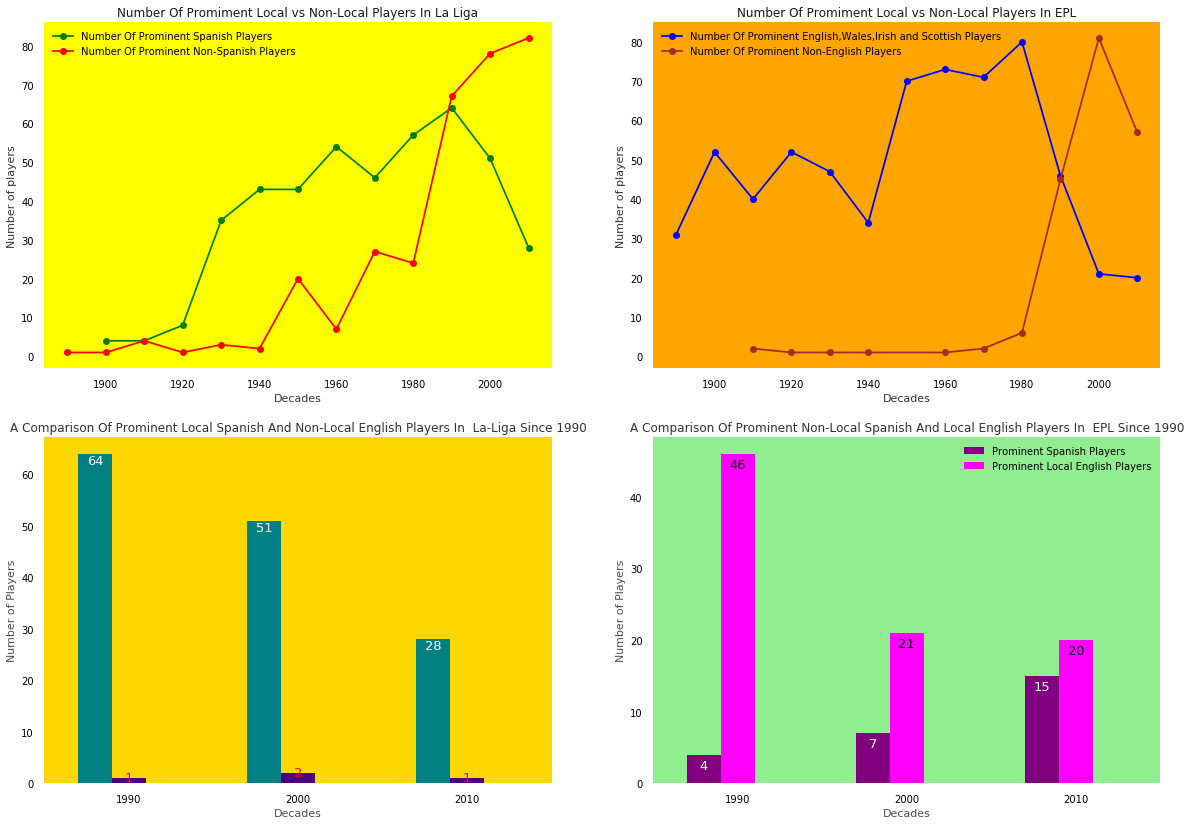

In [26]:
# plotting the above gathered information 

plt.figure(figsize=(20,14))
plt.style.use("seaborn-notebook")
plt.subplot(2,2,1)
plt.plot(dfspanish["Spanish"],"-o",color="Green",label="Number Of Prominent Spanish Players");
plt.plot(dfnonspanish["Spanish"],"-o",color="Red",label="Number Of Prominent Non-Spanish Players");
plt.xlabel("Decades",alpha=0.8)
plt.ylabel("Number of players",alpha=0.8)
plt.title("Number Of Promiment Local vs Non-Local Players In La Liga",alpha=0.9)
plt.gca().set_facecolor("yellow")
for i in plt.gca().spines.values():
    i.set_visible(False)
plt.tick_params(left=False, bottom=False)
plt.legend(frameon=False)



plt.subplot(2,2,2)
plt.plot(dfEPLlocal["English"],"-o",color="blue",label="Number Of Prominent English,Wales,Irish and Scottish Players");
plt.plot(dfEPLnonlocal["English"],"-o",color="brown",label="Number Of Prominent Non-English Players");
plt.gca().set_facecolor("orange")
for i in plt.gca().spines.values():
    i.set_visible(False)
plt.tick_params(bottom=False,left=False)
plt.xlabel("Decades",alpha=0.8)
plt.ylabel("Number of players",alpha=0.8)
plt.title("Number Of Promiment Local vs Non-Local Players In EPL",alpha=0.9)
plt.legend(frameon=False)



plt.subplot(2,2,4)
xcord=np.arange(3)
width=0.2
bars=plt.bar(xcord-width,spanish_dom,width=0.20,color="purple",align="center",label="Prominent Spanish Players");
bars2=plt.bar(xcord,Original_players,width=0.20,color="magenta",align="center",label="Prominent Local English Players");
plt.tick_params(left=False,bottom=False)
plt.xlabel("Decades",alpha=0.7)
plt.ylabel("Number of Players",alpha=0.7)
plt.title("A Comparison Of Prominent Non-Local Spanish And Local English Players In  EPL Since 1990",alpha=0.8)
for i in plt.gca().spines.values():
    i.set_visible(False)
plt.legend(frameon=False)
plt.gca().set_facecolor("lightgreen")
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 2, str(int(bar.get_height())) , 
                 ha='center', color='w', fontsize=13)
for bar in bars2:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 2, str(int(bar.get_height())) , 
                 ha='center', color='black', fontsize=13)

labels=["","1990","","2000","","2010",""]
k=plt.gca().get_xticks();
plt.xticks(k,labels);




plt.subplot(2,2,3)
bar3=plt.bar(xcord-width,localplayers,width=0.2,label="Prominent Local Spanish Players",color="teal");
bar4=plt.bar(xcord,Englishplayers_laliga,width=0.2,label="Prominent English Players",color="indigo");
plt.xlabel("Decades",alpha=0.7)
plt.ylabel("Number of Players",alpha=0.7)
plt.title("A Comparison Of Prominent Local Spanish And Non-Local English Players In  La-Liga Since 1990",alpha=0.8)
plt.gca().set_facecolor("gold")
plt.tick_params(left=False,bottom=False)
for i in plt.gca().spines.values():
    i.set_visible(False)
k1=plt.gca().get_xticks();
plt.xticks(k1,labels);
for bar in bar3:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 2, str(int(bar.get_height())) , 
                 ha='center', color='w', fontsize=13)
for bar in bar4:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.5, str(int(bar.get_height())) , 
                 ha='center', color='r', fontsize=13)